In [1]:
from google.colab import files
files.upload()

Saving archive (1).zip to archive (1).zip


{'archive (1).zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\x97|9O\x8fg\xc1\x92\xff\xff\xff\xff\xff\xff\xff\xff\x12\x00\x14\x00Mall_Customers.csv\x01\x00\x10\x00\xbe\x10\x00\x00\x00\x00\x00\x00\x91\x05\x00\x00\x00\x00\x00\x00]\x97\xcf\xca\x9dE\x0c\xc6\xf7\x82\xf7\xf0-\\X\x18a2\xff\xb3\x14E\xe9\xc2U\xaf\xa0\xb4\x87"\xb6\xa7R\xed\xfd\x9b<\xc9L\xa6.\n\xe5\xf7e2y\x92L\xde\x9c_\xbe\xfe\xf3\xef\xe7O\x8f/\xaf\x7fM\xbf?\x9e_\x1e\xe9\xe7\x0f\xf2\xef\xf9\xfc\xfa\xf6\xe3\xcb\xeb\xe7;\xf9\xd3\xcb\x8f\x7f\xfd\xf0*\xbd\xf9\xfb\xf1|\xff\xe7\xf3\xc3\xcb\x9bw\x9f\xbf\x08\xa3\x9f(\xe7W\xdf\x7f\x97s\xa6\xf4\xc7\xdb\x8f\x8fD\x9c\xa8\xa7\xca`\xc5X!e\x8b\xc0j\xfa\xed\xf1\t4\'\x1ai\x00\xb6\x03\xab\xc29A\xfb\xa6U\x1c\xcc\xd42\xe88\xb6E\xe94\x0f\xf3\xd8\xf6D\xcb\xdd\xae\xdb\xedJ\xdc@\xd9\xa2\x1aM\x83\xad\x8a(\x9f\xd3Y\xe1,\xa0.iL\xa8\xc2a*\xf7=\x9c\x18B\xe9\x88\xea\x0b\xba:h\xa8jJM\x95d\x02^\xeb\x84\xa5\xdd?<Q\x05v\xe6\xf3V$\x19\xac\xe6s\xb9eV6 \x93\\P/\xaa\xb3\xe0t\xc9\xf7\xe9\x9ax\x81\xba"e\xcd=\x96]$\xb0\x89x\xca

In [2]:
!unzip /content/mall_data.zip -d /content

Archive:  /content/mall_data.zip
  inflating: /content/Mall_Customers.csv  


In [4]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 


In [5]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
import numpy as np
from category_encoders import OneHotEncoder

In [6]:
mall = pd.read_csv('/content/Mall_Customers.csv')
mall.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spending Score']
mall.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


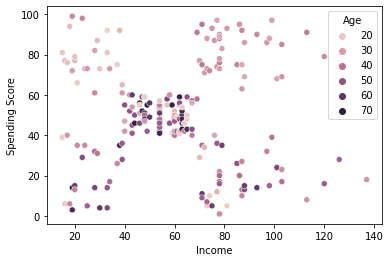

In [6]:
sns.scatterplot(mall['Income'], mall['Spending Score'], hue=mall['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


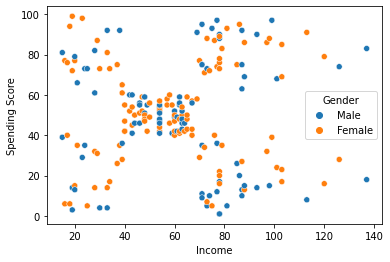

In [7]:
sns.scatterplot(mall['Income'], mall['Spending Score'], hue=mall['Gender'])

In [9]:
def group_inc(inc):
  if inc <= 30:
    return '15-30'
  elif inc <= 45:
    return '31-45'
  elif inc <= 60:
    return '46-60'
  elif inc <= 75:
    return '61-75'
  elif inc <= 90:
    return '76-90'
  elif inc <= 105:
    return '91-105'
  elif inc <= 120:
    return '106-120'
  else:
    return '121+'
inc_group = mall['Income'].apply(group_inc)

In [10]:
def group_age(age):
  if age <= 20:
    return '18-20'
  elif age <= 30:
    return '21-30'
  elif age <= 40:
    return '31-40'
  elif age <= 50:
    return '41-50'
  elif age <= 60:
    return '51-60'
  elif age <= 70:
    return '61-70'
age_group = mall['Age'].apply(group_age)

In [11]:
def group_score(score):
  if score <= 10:
    return '1-10'
  elif score <= 20:
    return '11-20'
  elif score <= 30:
    return '21-30'
  elif score <= 40:
    return '31-40'
  elif score <= 50:
    return '41-50'
  elif score <= 60:
    return '51-60'
  elif score <= 70:
    return '61-70'
  elif score <= 80:
    return '71-80'
  elif score <= 90:
    return '81-90'
  elif score <= 100:
    return '91-100'
score_group = mall['Spending Score'].apply(group_score)

In [12]:
mall['Income Group'] = inc_group
mall['Age Group'] = age_group
mall['Spend Group'] = score_group

In [14]:
mall

,CustomerID,Gender,Age,Income,Spending Score,Income Group,Age Group,Spend Group
0,1,Male,19,15,39,15-30,18-20,31-40
1,2,Male,21,15,81,15-30,21-30,81-90
2,3,Female,20,16,6,15-30,18-20,1-10
3,4,Female,23,16,77,15-30,21-30,71-80
4,5,Female,31,17,40,15-30,31-40,31-40
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,106-120,31-40,71-80
196,197,Female,45,126,28,121+,41-50,21-30
197,198,Male,32,126,74,121+,31-40,71-80
198,199,Male,32,137,18,121+,31-40,11-20


In [16]:
inc_spend_joint = pd.crosstab(mall['Income Group'], mall['Spend Group'])
pd.crosstab(mall['Income Group'], mall['Spend Group'], margins=True)

Spend Group,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,All
Income Group,,,,,,,,,,,
106-120,1,1,0,0,0,0,0,1,0,1,4
121+,0,1,1,0,0,0,0,1,1,0,4
15-30,5,4,1,6,0,0,2,8,3,3,32
31-45,1,2,2,2,7,5,2,2,1,2,26
46-60,0,0,0,1,18,21,0,0,0,0,40
61-75,5,1,1,3,15,9,0,6,1,3,44
76-90,4,8,3,3,0,0,2,6,6,4,36
91-105,0,3,2,2,0,0,2,0,4,1,14
All,16,20,10,17,40,35,8,24,16,14,200


In [17]:
# chi2 stat for income groups spending what they spent
stat, p_val, dof, expctd = st.chi2_contingency(inc_spend_joint)
stat, p_val

(168.85427792912037, 1.3009291357400926e-11)

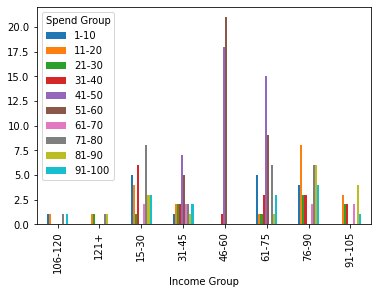

In [18]:
inc_spend_joint.plot(kind='bar')

In [19]:
age_spend_joint = pd.crosstab(mall['Age Group'], mall['Spend Group'])
pd.crosstab(mall['Age Group'], mall['Spend Group'], margins=True)

Spend Group,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,All
Age Group,,,,,,,,,,,
18-20,4,0,0,1,5,4,1,1,0,1,17
21-30,0,1,1,2,5,8,3,11,10,4,45
31-40,5,3,4,7,5,5,4,12,6,9,60
41-50,3,9,3,5,12,6,0,0,0,0,38
51-60,3,6,2,1,6,5,0,0,0,0,23
61-70,1,1,0,1,7,7,0,0,0,0,17
All,16,20,10,17,40,35,8,24,16,14,200


In [20]:
stat, p_val, dof, expctd = st.chi2_contingency(age_spend_joint)
stat, p_val

(113.01930449944297, 8.967997730609383e-08)

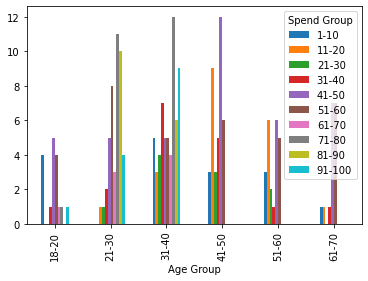

In [21]:
age_spend_joint.plot(kind='bar')

In [22]:
gender_spend_joint = pd.crosstab(mall['Gender'], mall['Spend Group'])
pd.crosstab(mall['Gender'], mall['Spend Group'], margins=True)

Spend Group,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,All
Gender,,,,,,,,,,,
Female,5,9,8,12,25,18,3,16,10,6,112
Male,11,11,2,5,15,17,5,8,6,8,88
All,16,20,10,17,40,35,8,24,16,14,200


In [23]:
stat, p_val, dof, expctd = st.chi2_contingency(gender_spend_joint)
stat, p_val

(13.223726990796322, 0.1527414143710254)

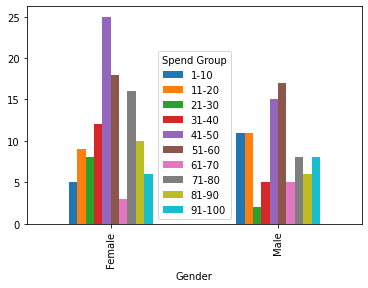

In [24]:
gender_spend_joint.plot(kind='bar')

In [25]:
X = mall[['Income', 'Age', 'Gender']]
y = mall['Spending Score']

In [26]:
mall['IncAge Group'] = mall['Income Group'] + ' income and ' + mall['Age Group'] + ' age'

In [27]:
mall

,CustomerID,Gender,Age,Income,Spending Score,Income Group,Age Group,Spend Group,IncAge Group
0,1,Male,19,15,39,15-30,18-20,31-40,15-30 income and 18-20 age
1,2,Male,21,15,81,15-30,21-30,81-90,15-30 income and 21-30 age
2,3,Female,20,16,6,15-30,18-20,1-10,15-30 income and 18-20 age
3,4,Female,23,16,77,15-30,21-30,71-80,15-30 income and 21-30 age
4,5,Female,31,17,40,15-30,31-40,31-40,15-30 income and 31-40 age
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,106-120,31-40,71-80,106-120 income and 31-40 age
196,197,Female,45,126,28,121+,41-50,21-30,121+ income and 41-50 age
197,198,Male,32,126,74,121+,31-40,71-80,121+ income and 31-40 age
198,199,Male,32,137,18,121+,31-40,11-20,121+ income and 31-40 age


In [28]:
incage_spend_joint = pd.crosstab(mall['IncAge Group'], mall['Spend Group'],margins=True, normalize='index')

In [29]:
incage_spend_joint

Spend Group,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
IncAge Group,,,,,,,,,,
106-120 income and 31-40 age,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333
106-120 income and 41-50 age,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
121+ income and 21-30 age,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
121+ income and 31-40 age,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
121+ income and 41-50 age,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15-30 income and 18-20 age,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
15-30 income and 21-30 age,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.272727,0.090909
15-30 income and 31-40 age,0.100000,0.100000,0.000000,0.400000,0.000000,0.000000,0.100000,0.100000,0.000000,0.200000
15-30 income and 41-50 age,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
first = incage_spend_joint['91-100'].idxmax()
second = incage_spend_joint['81-90'].idxmax()
third = incage_spend_joint['71-80'].idxmax()

In [35]:
incage_spend_joint[(incage_spend_joint.index == first) |
                   (incage_spend_joint.index == second) |
                   (incage_spend_joint.index == third)]

Spend Group,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
IncAge Group,,,,,,,,,,
121+ income and 21-30 age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
15-30 income and 21-30 age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.636364,0.272727,0.090909
31-45 income and 18-20 age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.500000
